# **Transformada Discreta de Fourier - DFT**

A Transformada Discreta de Fourier (DFT) é o membro da família utilizado para sinais digitalizados. Ela possui uma componente real e imaginária. A DFT é uma representação no domínio da frequência da sequência de entrada original. Se a sequência original abranger todos os valores diferentes de zero de uma função, sua DTFT é contínua (e periódica) e a DFT fornece amostras discretas de um ciclo. Se a sequência original for um ciclo de uma função periódica, a DFT fornece todos os valores diferentes de zero de um ciclo da DTFT.

A DFT é a transformada discreta mais importante, usada para realizar a análise de Fourier em muitas aplicações práticas. No processamento de sinal digital, a função é qualquer quantidade ou sinal que varie ao longo do tempo, como a pressão de uma onda sonora, um sinal de rádio ou leituras diárias de temperatura, amostradas em um intervalo de tempo finito (geralmente definido por uma função de janela). No processamento de imagens, as amostras podem ser os valores de pixels ao longo de uma linha ou coluna de uma imagem raster. A DFT também é usada para resolver eficientemente equações diferenciais parciais e para realizar outras operações, como convoluções ou multiplicação de inteiros grandes. [wiki](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)

## **Definição**

A DFT é dada da seguinte forma:

$$ \boxed{ X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2 \pi}{N} k n } = \sum_{n=0}^{N-1} x[n] \left[ \cos \left(\frac{2 \pi}{N} k n \right) + i \sin \left(\frac{2 \pi}{N} k n \right) \right]}$$

e a sua inversa é dada da seguinte forma:

$${\displaystyle \boxed{x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \, e^{i \frac{2 \pi}{N} k n }}}$$

## **Relação entre a DTFT e a DFT**

* O espectro da DFT $X[k]$ é discreto.

* Quando $k$ varia $0, 1, 2, ..., N-1$, especificamos multiplos inteiros de $\frac{2\pi}{N}$

* O espectro da DFT $X[k]$ é **exatamente igual** ao espectro da DTFT $X(\omega)$ para valores $\omega = \frac{2 \pi}{N} k$

Veja como as duas se comportam na imagem que demonstra uma função $x[n]$, sua DTFT $X(\omega)$ e sua DFT $X[u]$ :

![](../Imagens/Unidade1/dtft_and_dft.png)

Imagem Disponível [aqui](https://www.quora.com/What-is-the-difference-between-DTFT-and-DFT)

### **Observações importantes!**

* Observando a equação da DFT, percebe-se que a escolha de N não é fixa. Você pode fazer uma maior ou menor amostragem.

* Quanto maior for N, maior é a semelhança entre os espectros da TDF e da TFTD (maior é a precisão da TDF).

* Se $x[n]$ tem comprimento $L < N$ , nós podemos adicionar à sequência $x[n]$, $N − L$ amplitudes nulas (zero padding)

* Essa representação é útil somente se um número N de amostras da TFTD em um período é maior, ou igual, ao tamanho do sinal (L).

## **Vantagens da DFT**

* Há uma correspoendência de 1 para 1 entre $x[n]$ e $X[k]$

* Há um algoritmo extremamente rápido, chamado de Transformada Rápida de Fourier (FFT – Fast Fourier Transform) para a obtenção da DFT. [Falaremos adiante].

* A TDF está extremamente relacionada à Série de Fourier de Tempo Discreto de coeficientes
espectrais $c_k$

$$c_k = \frac{X[k]}{N}$$

### **Exercício Feito 01**

Calcule a DFT do seguinte sinal:

$$x[n] = \left\{ \begin{matrix} 1 \, \text{ , se 0 ≤ n ≤ 4} \\ -1 \, \text{ , se 5 ≤ n ≤ 9} \end{matrix}\right.$$

* **SOLUÇÂO**

$$\begin{align*} X[k] &= \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2 \pi}{N} kn} \\ \, &= \sum_{n=0}^{4} 1 \cdot e^{-i \frac{2 \pi}{10} kn} + \sum_{n=5}^{9} (-1) \cdot e^{-i \frac{2 \pi}{10} kn} \\ \, &= \frac{1 - e^{-i \pi k}}{1 - e^{-i \frac{2 \pi}{10} k}} - \frac{1 - e^{-i2\pi k}}{1 - e^{-i \frac{2 \pi}{10} k}} \\ \, &= \frac{2(1 - e^{-i\pi k})}{1 - e^{-i \frac{2\pi}{10} k}} \\ \, &= \frac{2(1 - (-1)^{k})}{1 - e^{-i \frac{2\pi}{10} k}} \end{align*}$$

Se $k$ for par, então $X[k] = 0$.

Se $k$ for par, então $X[k] = \frac{4}{1 - e^{-i \frac{2\pi}{10} k}}$

### **EXEMPLO 01: Visualizando o sinal e sua DFT**

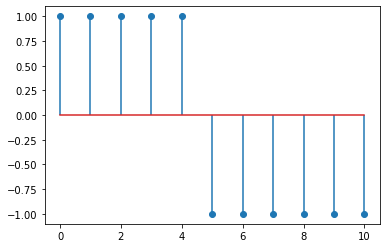

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Criando um array no eixo n de inteiros:
n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Criando um array no eixo y - sinal contínuo:
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

# Plotando o sinal o sinal:
plt.stem(n, y)

# Visualizando as imagens:
plt.show()

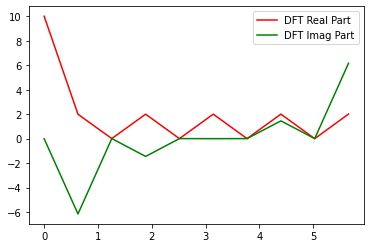

In [38]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])       # Criando um array no eixo n de inteiros
k = np.arange(0.001, 10.001, 1)                        # Criando um espaço de K [1, 2, ..., 100]
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])  # Criando um array no eixo y
dft = 2*(1 - np.e**(-1j*np.pi*k))/(1 - np.e**(-1j*2*np.pi*k/10))

# Plotando o sinal o sinal:
plt.plot(2*np.pi/10*k, dft.real, label='DFT Real Part', color='red')
plt.plot(2*np.pi/10*k, dft.imag, label='DFT Imag Part', color='green')

# Colocando Legendas
plt.legend()

# Visualizando as imagens:
plt.show()

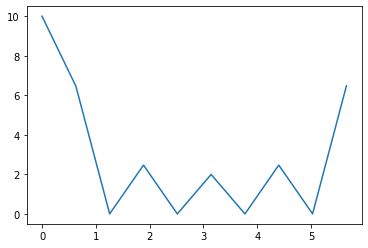

In [39]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])       # Criando um array no eixo n de inteiros
k = np.arange(0.001, 10.001, 1)                        # Criando um espaço de K [1, 2, ..., 100]
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])  # Criando um array no eixo y
dft = 2*(1 - np.e**(-1j*np.pi*k))/(1 - np.e**(-1j*2*np.pi*k/10))

# Plotando o sinal o sinal - Módulo do sinal:
plt.plot(2*np.pi/10*k, abs(dft))

# Visualizando as imagens:
plt.show()

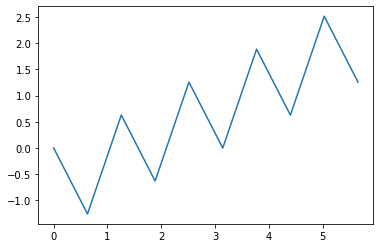

In [40]:
import numpy as np
import matplotlib.pyplot as plt

n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])       # Criando um array no eixo n de inteiros
k = np.arange(0.001, 10.001, 1)                        # Criando um espaço de K [1, 2, ..., 100]
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])  # Criando um array no eixo y
dft = 2*(1 - np.e**(-1j*np.pi*k))/(1 - np.e**(-1j*2*np.pi*k/10))

# Plotando o sinal o sinal - Módulo do sinal:
plt.plot(2*np.pi/10*k, np.angle(dft))

# Visualizando as imagens:
plt.show()

## **Propriedades da DFT**

### **Linearidade**

A TDF de uma combinação linear de duas sequências é a combinação linear das TDF das sequências individuais

$$ \boxed{X[k] \stackrel{TDF}{\Leftrightarrow} k_1X_1[k] + k_2X_2[k]}$$

### **Reversão no tempo**

A TDF de x[-x] é tal que:

$$ \boxed{x[-n] \stackrel{TDF}{\Leftrightarrow}X[-k]}$$

### **Deslocamento no Tempo**

$$ \boxed{x[n - n_0] \stackrel{TDF}{\Leftrightarrow} e^{-i \frac{2 \pi}{N} k n_0 } X[k]}$$

### **Deslocamento Circular**

Quando definimos uma partição $w = \frac{2\pi}{N}$, definimos "uma partição no circulo" . Se ultrapassamos o valor de N com ko parâmetro k, estamos pegando frações circulares repetidas.

* Exemplo

Seja N = 4, note que X[k] é dado por:

$$X[k] = \sum_{n=0}^{3} x[n] \cdot e^{-i \frac{2 \pi}{4} k n }$$

Note ainda que $X[0] = X[4]$, pois:

$$X[0] = \sum_{n=0}^{3} x[n] \cdot e^{0} = \sum_{n=0}^{3} x[n] \cdot e^{-i 2 \pi n} = X[4]$$

### **Convolução circular no tempo**

Se x[n] e h[n] são periódicas com período N, com $x[n]$ $\Leftrightarrow$ $X[k]$ e $h[n]$ $\Leftrightarrow$ $H[k]$, então

$$ \boxed{x*h = \sum_{u=0}^{N-1} x[u]h[l - u] \stackrel{TDF}{\Leftrightarrow} X[k]H[k]}$$
* **Provas**

Disponível [aqui](DTFT.ipynb)


### **Matriz DFT**

Outra maneira de olhar para a DFT é notar que na discussão acima, a DFT pode ser expressa como a matriz DFT, uma matriz de Vandermonde, introduzida por Sylvester em 1867,

$${\displaystyle \mathbf {F} ={\begin{bmatrix}\omega _{N}^{0\cdot 0}&\omega _{N}^{0\cdot 1}&\cdots &\omega _{N}^{0\cdot (N-1)}\\\omega _{N}^{1\cdot 0}&\omega _{N}^{1\cdot 1}&\cdots &\omega _{N}^{1\cdot (N-1)}\\\vdots &\vdots &\ddots &\vdots \\\omega _{N}^{(N-1)\cdot 0}&\omega _{N}^{(N-1)\cdot 1}&\cdots &\omega _{N}^{(N-1)\cdot (N-1)}\\\end{bmatrix}}}$$

Onde ${\displaystyle \omega _{N}=e^{-i2\pi /N}}$ é uma raiz N-ésima primitiva da unidade.

A transformada inversa é então dada pela inversa da matriz acima,

$${\displaystyle \mathbf {F} ^{-1}={\frac {1}{N}}\mathbf {F} ^{*}}$$

Com constantes de normalização unitária ${\textstyle 1/{\sqrt {N}}}$, a DFT torna-se uma transformação unitária, definida por uma matriz unitária:

* $\mathbf{U} ={\frac{1}{\sqrt{N}}}\mathbf{F}$

* $\mathbf{U}^{-1} = \mathbf{U}^{*}$

* $\left|\det(\mathbf{U} )\right| =1$

Com essa transformação unitária, podemos resolver sistemas do tipo:

$$X = \mathbf{U} \cdot x$$

Onde X representa a DFT de um sinal x no domínio do tempo.

Visualizando U:

$${\displaystyle \mathbf{U}={\frac {1}{\sqrt {N}}}{\begin{bmatrix}1&1&1&1&\cdots &1\\1&\omega &\omega ^{2}&\omega ^{3}&\cdots &\omega ^{N-1}\\1&\omega ^{2}&\omega ^{4}&\omega ^{6}&\cdots &\omega ^{2(N-1)}\\1&\omega ^{3}&\omega ^{6}&\omega ^{9}&\cdots &\omega ^{3(N-1)}\\\vdots &\vdots &\vdots &\vdots &\ddots &\vdots \\1&\omega ^{N-1}&\omega ^{2(N-1)}&\omega ^{3(N-1)}&\cdots &\omega ^{(N-1)(N-1)}\end{bmatrix}}}$$

Visualizando o sistema:

$${\displaystyle \begin{bmatrix} X_0 \\ X_1 \\ X_2  \\ X_3 \\ \vdots \\ X_{(N-1)} \end{bmatrix} = {\frac {1}{\sqrt {N}}}{\begin{bmatrix}1&1&1&1&\cdots &1\\1&\omega &\omega ^{2}&\omega ^{3}&\cdots &\omega ^{N-1}\\1&\omega ^{2}&\omega ^{4}&\omega ^{6}&\cdots &\omega ^{2(N-1)}\\1&\omega ^{3}&\omega ^{6}&\omega ^{9}&\cdots &\omega ^{3(N-1)}\\\vdots &\vdots &\vdots &\vdots &\ddots &\vdots \\1&\omega ^{N-1}&\omega ^{2(N-1)}&\omega ^{3(N-1)}&\cdots &\omega ^{(N-1)(N-1)}\end{bmatrix}} \cdot \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_{(N-1)} \end{bmatrix}}$$

Que, na prática, é algo similar a representação da figura abaixo, para N = 8:

![](../Imagens/Unidade1/DFT_representacion_matrix.png)

Foto disponível [aqui](https://upload.wikimedia.org/wikipedia/commons/5/56/Fourierop_rows_only.png)

### **Aplicação da matrix**

In [14]:
import numpy as np
from scipy.linalg import dft


matrix = dft(5)                            # Dinindo a matrix DFT
np.set_printoptions(precision=2)           # Definindo a precisão de 2 dígitos - melhor visualização
print(f'\n A Matriz da DFT é: \n{matrix}') # Visualizando a matrix DFT
x = np.array([1, 2, 3, 0, 3])              # Definindo um vetor 'x'
print(f'\n O valor de x é: \n{x}\n')       # Visualizando 'x'
X = matrix @ x                             # Computa o valor da DFT de x
print(f'O Valor da DFT é: \n{X}\n')        # Printa o valor da DFT de x

"""
Esse resultado obtido com a matriz é o mesmo obtido pelo método Fast Forier Transform.
"""


 A Matriz da DFT é: 
[[ 1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j  ]
 [ 1.  +0.j    0.31-0.95j -0.81-0.59j -0.81+0.59j  0.31+0.95j]
 [ 1.  +0.j   -0.81-0.59j  0.31+0.95j  0.31-0.95j -0.81+0.59j]
 [ 1.  +0.j   -0.81+0.59j  0.31-0.95j  0.31+0.95j -0.81-0.59j]
 [ 1.  +0.j    0.31+0.95j -0.81+0.59j -0.81-0.59j  0.31-0.95j]]

 O valor de x é: 
[1 2 3 0 3]

O Valor da DFT é: 
[ 9.  +0.j    0.12-0.81j -2.12+3.44j -2.12-3.44j  0.12+0.81j]



# **DFT da voz humana**

In [1]:
from scipy.io.wavfile import read
import sounddevice as sd

# Lê o arquivo de aúdio
fs, data = read('voz.wav')
data = data[:, 0]
print(f'A frequência de amostragem é: {fs}')

# reproduz o arquivo de aúdio
sd.play(data, fs)

A frequência de amostragem é: 48000


### **Vizualisando a forma de onda da voz no domínio do tempo.**

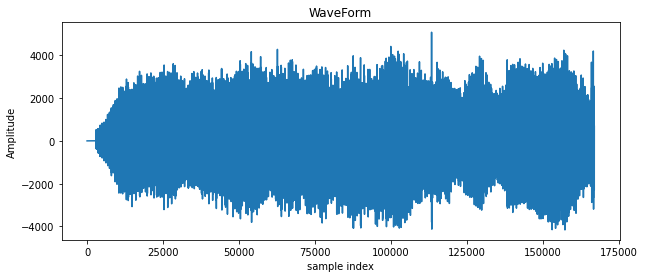

In [2]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# Lê o arquivo de aúdio
fs, data = read('voz.wav')
data = data[:, 0]

# Plota o gráfico do arquivo de aúdio - forma de onda no tempo.
plt.figure(figsize=(10, 4))    # Define o tamanho da figura
plt.plot(data)
plt.xlabel('sample index')
plt.ylabel('Amplitude')
plt.title('WaveForm')
plt.show()

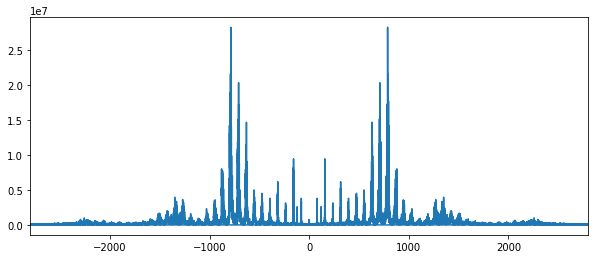

In [15]:
# DFT da Voz humana.
import numpy as np
from scipy.linalg import dft
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# Lê o arquivo de aúdio
fs, data = read('voz.wav')
data = data[:, 0]

# X axis - frequência
x = np.fft.fftfreq(len(data), 1/fs)

# Vefor da DFT
f = abs(np.fft.fft(data))

# Plotando
plt.figure(figsize=(10, 4))
plt.plot(x, f, label='DFT')
plt.xlim([-2800, 2800])
plt.show()